In [54]:
from joblib import dump, load
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
TFIDFEmbedding = load("TFIDFEmbedding.joblib")
KNNModel = load("KNNModel.joblib")

sbert = load("sbert.joblib")
faiss = load("faiss.joblib")

bm25 = load("bm25.joblib")

In [3]:
questions = []
answers = []

questions.append("What is Charlie Harlow's dosage?")
answers.append(0)

questions.append("What is the age of the patient with name Jenna Lundsten and has bladder cancer?")
answers.append(113)

questions.append("What was the procedure done for Richard Jasso, who had heavy tobacco abuse?")
answers.append(793)

questions.append("How did we obtain consent for surgery for Dorothy Robinson?")
answers.append(818)

questions.append("What is the procedure performed on the 55 year old female who is having a colonoscopy to screen for colon cancer?")
answers.append(976)

questions.append("What happened to the Michael Dunstan who takes hydrochlorothiazide for hypertension?")
answers.append(13)

questions.append("What is the operation done on Michael Neal?")
answers.append(1162)

questions.append("What is the medication given to Karen Lewis?")
answers.append(1449)

questions.append("What is the impression on Adam Juarez who took an MRI?")
answers.append(1546)

questions.append("What were the symptoms on Jason Olguin who was given amphotericin?")
answers.append(1593)


In [4]:
knn_answers = []
faiss_answers = []
bm25_answers = []
for question in questions: 
    # TFIDF + KNN
    tfidf = TFIDFEmbedding.transform([question])
    knn_ans = KNNModel.kneighbors(tfidf , return_distance=False)
    knn_answers.append(knn_ans)

    # SBERT + FAISS
    sbert_embedding = sbert.encode([question]).astype('float32')
    dustabces, indices = faiss.search(sbert_embedding , 10)
    faiss_answers.append(indices)

    # BM25
    bm_tokens = question.lower().split()
    bm_scores = np.argsort(bm25.get_scores(bm_tokens))[::-1][:10]
    bm25_answers.append(bm_scores)


In [5]:
knn_answers

[array([[1312, 3694, 4104, 3194, 3363, 1390, 4168, 1804, 3148, 1705]],
       dtype=int64),
 array([[ 215,   38,  113,  715, 1149,  171,  139,  931,  173, 4523]],
       dtype=int64),
 array([[1970, 1966, 3533, 1791, 4538, 3739, 4459, 4785, 3302, 4327]],
       dtype=int64),
 array([[1853, 2657, 4529, 4952, 3951, 4916,  818, 3673,  264, 2176]],
       dtype=int64),
 array([[ 976, 3610, 3158, 3626, 4486, 3613,  985,  973, 3600, 4452]],
       dtype=int64),
 array([[  13, 1947, 3392, 4444, 4381, 1366, 3285, 2437, 2375, 3396]],
       dtype=int64),
 array([[1932, 1977, 1947, 1619, 1162, 4718, 1961,  690, 1945, 1741]],
       dtype=int64),
 array([[3324, 4357,   73, 1320, 4104, 3194, 2776, 4232, 2414, 1754]],
       dtype=int64),
 array([[2134, 1817, 1591, 2932, 4502, 2797, 1558, 1547, 2796, 1551]],
       dtype=int64),
 array([[2041, 4106, 2094, 2761, 1536, 4163, 2074, 4565, 4322, 3501]],
       dtype=int64)]

In [6]:
faiss_answers

[array([[2151,    0, 1784, 4819, 3944, 4381, 4257, 3170, 3183, 1742]],
       dtype=int64),
 array([[ 113, 2253, 2996, 3584,  140, 3151, 4241, 4488, 3084, 3022]],
       dtype=int64),
 array([[4126,  247, 2941, 3847, 3423, 4070, 4353, 4555, 3406, 3195]],
       dtype=int64),
 array([[2409,  818, 3418, 4455,  367, 1132, 4574,  592, 4043, 1967]],
       dtype=int64),
 array([[3613,  985, 4455, 4486, 3158, 3626, 3608, 3584,  976,  731]],
       dtype=int64),
 array([[  13, 3777, 4083, 3396, 2833, 3813, 2973, 4665, 4268, 4238]],
       dtype=int64),
 array([[ 164,  752, 1947,  500,  407, 2309,   96, 2204, 1832, 4725]],
       dtype=int64),
 array([[4257, 4465, 1449, 2141, 3591, 4731, 4374, 3357, 2907, 3329]],
       dtype=int64),
 array([[2797, 1019,  118, 1558, 4578, 1679, 2737, 4447, 3405, 3055]],
       dtype=int64),
 array([[1593, 4264, 2446, 3213, 2959, 3823,  118, 3235, 4363, 1353]],
       dtype=int64)]

In [7]:
bm25_answers

[array([1494, 2288,    0, 4430, 1395, 3958, 4057, 3317, 1096, 3301],
       dtype=int64),
 array([ 113,   73, 1320, 1762, 4124, 1771, 4133, 1777, 4144, 4518],
       dtype=int64),
 array([ 793, 3302, 4327, 2606,  567, 4459, 3739, 3196, 4108, 4768],
       dtype=int64),
 array([4043, 4524, 2144,  568, 2673, 4529, 4952, 3353,  129, 4391],
       dtype=int64),
 array([3610,  976, 3331, 4368, 4472, 3409,  962, 3594, 3158, 3626],
       dtype=int64),
 array([  13, 4381, 3392, 4444, 4551, 4394, 2854, 3409, 4472, 1354],
       dtype=int64),
 array([4551, 1317, 3584, 4455, 2417, 1419, 4167, 2678, 2214,  798],
       dtype=int64),
 array([2414,  926, 4965, 1704, 3294, 3247, 4289, 3249, 4252, 1470],
       dtype=int64),
 array([1546, 2732, 2968, 1033, 4252, 1361, 3281, 4313, 1914, 3310],
       dtype=int64),
 array([1593, 1203,  276, 1292, 1632, 1126,  139,  931, 3844, 4554],
       dtype=int64)]

In [ ]:
# Accuracy scores:
faiss_accuracy = 0
bm25_accuracy = 0
knn_accuracy = 0

faiss_inverse = 0
bm25_inverse = 0
knn_inverse = 0

for i in range(0, 10, 1):
    if(answers[i] in knn_answers[i]):
        knn_accuracy+=1
        knn_index = knn_answers[i].tolist()[0].index(answers[i]) + 1
        knn_inverse += (1/knn_index)
    if(answers[i] in faiss_answers[i]):
        faiss_accuracy+=1
        faiss_index = faiss_answers[i].tolist()[0].index(answers[i]) + 1
        faiss_inverse += (1/faiss_index)
    if(answers[i] in bm25_answers[i]):
        bm25_accuracy+=1
        bm_index = bm25_answers[i].tolist().index(answers[i]) + 1
        bm25_inverse += (1/bm_index)

faiss index :  2
bm index :  3
knn index :  3
faiss index :  1
bm index :  1
bm index :  1
knn index :  7
faiss index :  2
knn index :  1
faiss index :  9
bm index :  2
knn index :  1
faiss index :  1
bm index :  1
knn index :  5
faiss index :  3
bm index :  1
faiss index :  1
bm index :  1


In [22]:
faiss_accuracy

7

In [10]:
bm25_accuracy

7

In [12]:
knn_accuracy

5

In [42]:
bm25_inverse

5.833333333333333

In [46]:
knn_mrr = knn_inverse / len(answers)
faiss_mrr = faiss_inverse / len(answers)
bm25_mrr = bm25_inverse / len(answers)

In [49]:
print("knn mrr : " , knn_mrr)
print("faiss mrr : " , faiss_mrr)
print("bm25 mrr : " , bm25_mrr)

knn mrr :  0.26761904761904765
faiss mrr :  0.4444444444444445
bm25 mrr :  0.5833333333333333


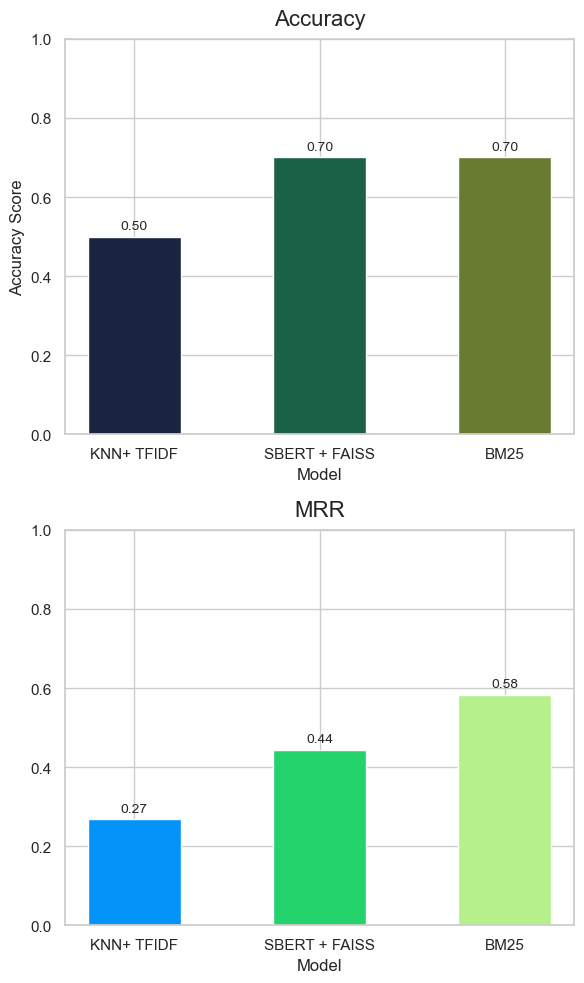

In [72]:
models = ['KNN+ TFIDF', 'SBERT + FAISS', 'BM25']
accuracy_scores = [knn_accuracy / 10, faiss_accuracy / 10, bm25_accuracy / 10]

mrr_scores = [knn_mrr , faiss_mrr , bm25_mrr]

fig, axes = plt.subplots(2, 1, figsize=(6, 10), sharey=True)  # 1 row, 2 columns

# Test 1 plot
axes[0].bar(models, accuracy_scores, color = sns.color_palette('cubehelix'), width = 0.5)
axes[0].set_title('Accuracy', fontsize=16, pad=10)
axes[0].set_ylabel('Accuracy Score', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylim(0, 1)  # Assuming accuracy is between 0 and 1
for i, score in enumerate(accuracy_scores):
    axes[0].text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=10)

# Test 2 plot
axes[1].bar(models, mrr_scores, color = sns.color_palette('terrain'), width = 0.5)
axes[1].set_title('MRR', fontsize=16, pad=10)
axes[1].set_xlabel('Model', fontsize=12)
for i, score in enumerate(mrr_scores):
    axes[1].text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()